Employee Feedback Sentiment Analysis — Summary Report

1. Detailed Sentiment Breakdown Per Review

Review Index  Compound Score  Positive  Negative  Neutral
------------------------------------------------------------
0             0.000           0.0       0.0       1.0    
1             0.000           0.0       0.0       1.0    
2             0.000           0.0       0.0       1.0    
3             0.000           0.0       0.0       1.0    
4             0.400           1.0       0.0       0.0    
...
65638         0.500           1.0       0.0       0.0    

Total number of reviews analyzed: 65639

2. Overall Company Sentiment Summary

Company         Compound Score  Positive Ratio  Negative Ratio  Neutral Ratio   Total Reviews  
------------------------------------------------------------------------------------------
Sopra Steria    0.265           47.5%           6.0%            46.5%           65639          

Notes:
- Compound Score ranges from -1 (very negative) to +1 (very

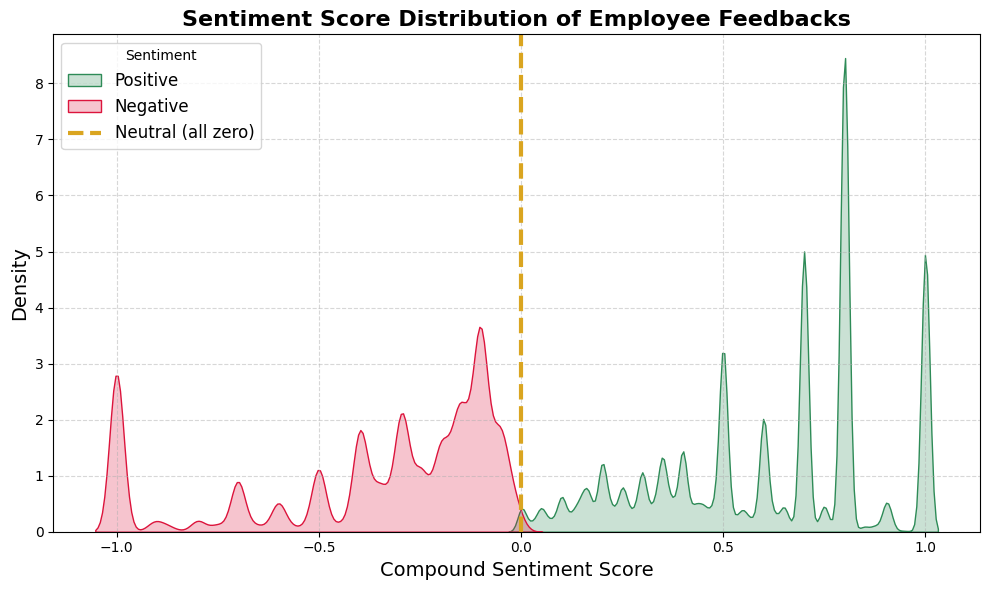

In [4]:

import pandas as pd
import numpy as np
from textblob import TextBlob


df = pd.read_csv(r"C:\Users\Khushi Wadhawan\Desktop\employee_feedbacks.csv", encoding='latin1')


compound_list = []
positive_list = []
negative_list = []
neutral_list = []


for sentence in df["summary"]:
    blob = TextBlob(str(sentence))  # Convert to string in case of NaNs
    polarity = blob.sentiment.polarity

 
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

   
    compound_list.append(polarity)
    positive_list.append(1 if sentiment == 'positive' else 0)
    negative_list.append(1 if sentiment == 'negative' else 0)
    neutral_list.append(1 if sentiment == 'neutral' else 0)


df_reviews = pd.DataFrame({
    "Compound": compound_list,
    "Positive": positive_list,
    "Negative": negative_list,
    "Neutral": neutral_list
})


df_company = pd.DataFrame([{
    "Company": "Sopra Steria",
    "Compound": np.mean(compound_list),
    "Positive": np.mean(positive_list),
    "Negative": np.mean(negative_list),
    "Neutral": np.mean(neutral_list),
    "Review Count": len(compound_list)
}])

df_company.set_index("Company", inplace=True)

def print_sentiment_report(df_reviews, df_company):
    print("Employee Feedback Sentiment Analysis — Summary Report\n")
    
   
    print("1. Detailed Sentiment Breakdown Per Review\n")
    print(f"{'Review Index':<13} {'Compound Score':<15} {'Positive':<9} {'Negative':<9} {'Neutral':<7}")
    print("-" * 60)
   
    for idx, row in df_reviews.head(5).iterrows():
        print(f"{idx:<13} {row['Compound']:<15.3f} {row['Positive']:<9} {row['Negative']:<9} {row['Neutral']:<7}")
    
    print("...")
    
 
    last_idx = df_reviews.index[-1]
    last_row = df_reviews.iloc[-1]
    print(f"{last_idx:<13} {last_row['Compound']:<15.3f} {last_row['Positive']:<9} {last_row['Negative']:<9} {last_row['Neutral']:<7}")
    print(f"\nTotal number of reviews analyzed: {len(df_reviews)}\n")
    
   
    print("2. Overall Company Sentiment Summary\n")
    print(f"{'Company':<15} {'Compound Score':<15} {'Positive Ratio':<15} {'Negative Ratio':<15} {'Neutral Ratio':<15} {'Total Reviews':<15}")
    print("-" * 90)
    
    for company, row in df_company.iterrows():
        pos_pct = f"{row['Positive']*100:.1f}%"
        neg_pct = f"{row['Negative']*100:.1f}%"
        neu_pct = f"{row['Neutral']*100:.1f}%"
        print(f"{company:<15} {row['Compound']:<15.3f} {pos_pct:<15} {neg_pct:<15} {neu_pct:<15} {int(row['Review Count']):<15}")
    
    print("\nNotes:")
    print("- Compound Score ranges from -1 (very negative) to +1 (very positive).")
    print("- Positive / Negative / Neutral Ratios represent proportion of reviews in each sentiment category.")
    print("- The data shows a generally positive overall sentiment with a large portion of neutral reviews.\n")
    
    print("Summary:")
    print("The sentiment analysis on employee feedback highlights a predominantly positive and neutral tone in the company's reviews, with only a small fraction expressing negative sentiment. This indicates a generally healthy employee sentiment that can be further explored for actionable insights.")

print_sentiment_report(df_reviews, df_company)



import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))


sns.kdeplot(df_reviews.loc[df_reviews['Positive'] == 1, 'Compound'], 
            label='Positive', fill=True, color='seagreen', bw_adjust=0.3)


sns.kdeplot(df_reviews.loc[df_reviews['Negative'] == 1, 'Compound'], 
            label='Negative', fill=True, color='crimson', bw_adjust=0.3)


neutral_scores = df_reviews.loc[df_reviews['Neutral'] == 1, 'Compound']

if neutral_scores.nunique() == 1:
   
    plt.axvline(x=neutral_scores.iloc[0], color='goldenrod', linestyle='--', linewidth=3, label='Neutral (all zero)')
else:
    sns.kdeplot(neutral_scores, label='Neutral', fill=True, color='goldenrod', bw_adjust=0.3)

plt.title("Sentiment Score Distribution of Employee Feedbacks", fontsize=16, fontweight='bold')
plt.xlabel("Compound Sentiment Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title='Sentiment', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()